# Requirements

In [15]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import matplotlib.pyplot as plt

# Configuration

In [16]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Simple Usage

In [7]:
# Initialize the webdriver.
browser = webdriver.Chrome(options=options)

In [8]:
# Navigate to a web page.
browser.get('https://www.apple.com/mk/')

KeyboardInterrupt: 

In [ ]:
# Print the page source code.
print(browser.page_source)

In [ ]:
# Select an element from the page.
element = browser.find_element(By.CLASS_NAME, 'headline')

In [ ]:
# Print the element's innner text.
print(element.text)

# Laboratory Exercise - Run Mode (8 points)

In this laboratory assignment, the goal is to perform web scraping using **Selenium** on the website https://www.scrapethissite.com/pages/forms/. The task includes the extraction of **hockey team names** and their **wins** and **losses** in the respective **year** for a minimum of 25 hockey teams. Following this data extraction, you will construct a data frame to organize the collected data. Finally, you are expected to generate a histogram to provide a visual representation of the distribution of wins and losses in the year 1990.

## Hints
- To navigate to a specific page with a given URL, use the `browser.get(url)` method.
- When selecting a single element, use `browser.find_element`, and for multiple elements, use `browser.find_elements`. Both of these functions take two arguments. The first specifies the attribute used to locate the element on the web page, and the second specifies the value of that attribute.
- The `By` class is used to specify which attribute is used to locate elements on a page. These are the various ways the attributes are used to locate elements on a page: `By.ID`, `By.NAME`, `By.TAG_NAME`, `BY.CLASS_NAME`, `By.CSS_SELECTOR`, etc.
- For more details, check the documentation (https://selenium-python.readthedocs.io/locating-elements.html).

## Solution

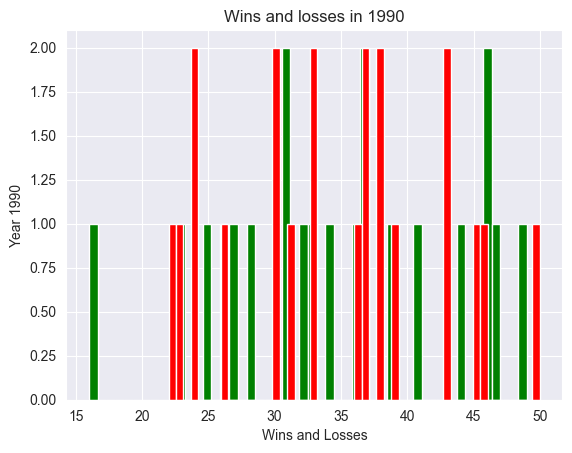

In [27]:
driver = webdriver.Chrome(options=options)
driver.get("https://www.scrapethissite.com/pages/forms/")
team_names = driver.find_elements(By.CLASS_NAME,'name')
years = driver.find_elements(By.CLASS_NAME,'year')
wins = driver.find_elements(By.CLASS_NAME,'wins')
losses = driver.find_elements(By.CLASS_NAME,'losses')
data = []
for i in range(len(team_names)):
    dictionary = {
        "Team name":team_names[i].text,
        "Year":int(years[i].text),
        "Wins":int(wins[i].text),
        "Losses":int(losses[i].text)
    }
    data.append(dictionary)
df = pd.DataFrame(data)
df.to_csv('/Users/leonmacbook/PycharmProjects/coooking.../Voved vo nauka za podatoci/lab/1 grupa A - 29/data_29.10.2024_1.csv')
only_1990 = df[df['Year'] == 1990]#only the matches in 1990
plt.hist(only_1990['Wins'], bins=50,color='green')
plt.hist(only_1990['Losses'], bins=50,color='red')
plt.xlabel('Wins and Losses')
plt.ylabel('Year 1990')
plt.title('Wins and losses in 1990')
plt.show()
driver.quit()

In [ ]:
# Add as many code boxes as you need.

# Laboratory Exercise - Bonus Task (+ 2 points)

In the context of scraping the website https://www.scrapethissite.com/pages/forms/, the additional task involves searching for the hockey team 'Boston Bruins' using the available search field. You will extract the wins and losses data for this team covering the years from 1990 to 2011. After gathering this information, your task is to create a line plot where the wins and losses of the 'Boston Bruins' team are visualized across the years, displaying both trends on the same plot.

## Hints
- To populate an input field (`input_field`) with some `text` use `input_field.send_keys(text)`.
- To click on a specific `element` on a web page use `element.click()`.

## Solution

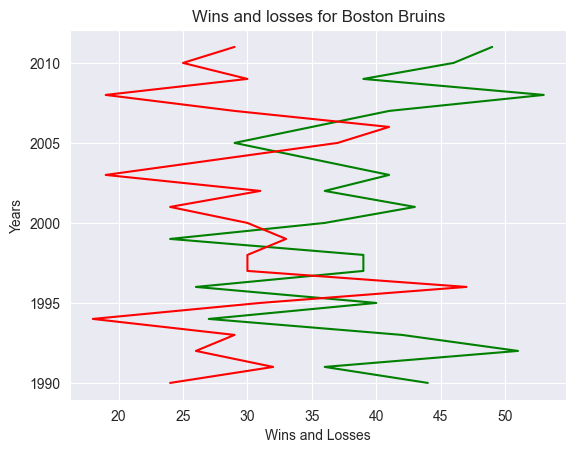

    Year  Wins  Losses
0   1990    44      24
1   1991    36      32
2   1992    51      26
3   1993    42      29
4   1994    27      18
5   1995    40      31
6   1996    26      47
7   1997    39      30
8   1998    39      30
9   1999    24      33
10  2000    36      30
11  2001    43      24
12  2002    36      31
13  2003    41      19
14  2005    29      37
15  2006    35      41
16  2007    41      29
17  2008    53      19
18  2009    39      30
19  2010    46      25
20  2011    49      29


In [42]:
#https://www.scrapethissite.com/pages/forms/?page_num=6
driver = webdriver.Chrome(options=options)
counter = 1
statistics = {}
while counter <= 24:
    url = f"https://www.scrapethissite.com/pages/forms/?page_num={counter}"
    driver.get(url)
    stats_for_the_team = driver.find_elements(By.CSS_SELECTOR,".team")
    for i in range(len(stats_for_the_team)):
        if "Boston Bruins" in stats_for_the_team[i].text:
            year = int(stats_for_the_team[i].find_element(By.CSS_SELECTOR,'.year').text)
            wins = int(stats_for_the_team[i].find_element(By.CSS_SELECTOR,".wins").text)
            losses = int(stats_for_the_team[i].find_element(By.CSS_SELECTOR,".losses").text)
            if year not in statistics.keys():
                statistics[year] = {"Wins":0,"Losses":0}
            statistics[year]['Wins'] += wins
            statistics[year]['Losses'] += losses
    counter += 1
driver.quit()
df = pd.DataFrame.from_dict(statistics, orient='index')
df.to_csv("/Users/leonmacbook/PycharmProjects/coooking.../Voved vo nauka za podatoci/lab/1 grupa A - 29/data_29.10.2024_2.csv", index=False)
df.reset_index(inplace=True)
df.rename(columns={'index':'Year'}, inplace=True)
plt.plot(df['Wins'],df['Year'],color='green')
plt.plot(df['Losses'],df['Year'],color='red')
plt.xlabel('Wins and Losses')
plt.ylabel('Years')
plt.title('Wins and losses for Boston Bruins')
plt.show()
df.to_csv("/Users/leonmacbook/PycharmProjects/coooking.../Voved vo nauka za podatoci/lab/1 grupa A - 29/data_29.10.2024_2.csv", index=False)
print(df)


In [ ]:
# Add as many code boxes as you need.